Smith ita - eng DEBUG

In [1]:
import os
import csv
import matplotlib.pyplot as plt
import pickle
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from gensim.models import KeyedVectors
import copy
import numpy as np

Display loss

In [2]:
def plot_progress(output_folder):
    # Plot learning curve
    loss_fn = os.path.join(output_folder, 'train_mod', 'loss_output.csv')
    data_x = []
    data_y = []

    with open(loss_fn) as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        for row in spamreader:
            data_x.append(int(row[0]))
            data_y.append(float(row[1]))


    plt.plot(data_x, data_y, c='r')
    plt.title('Learning curve')
    plt.xlabel('Epochs')
    plt.ylabel('Avg sims')
    plt.grid()
    plt.show()

    # Plot precision curves
    def append_precs(var, data):
        var[0].append(data[1][0])
        var[1].append(data[1][1])
        var[2].append(data[1][2])

    colors = ['b', 'g', 'y']
    prec_nbs = [1, 5, 10]
    prec_en_it = [[], [], []]
    prec_it_en = [[], [], []]
    prec_fn = os.path.join(output_folder, 'train_mod', 'precision_output')
    with open(prec_fn, 'rb') as picklefile:
        precs = pickle.load(picklefile)
    for i, ls in enumerate(precs):
        en_it = ls[0]
        it_en = ls[1]
        append_precs(prec_en_it, en_it)
        append_precs(prec_it_en, it_en)

    nb = len(prec_en_it)
    for i in range(nb):
        plt.plot(data_x, prec_en_it[i], c=colors[i])
        plt.title('Precision({}) en-it'.format(prec_nbs[i]))
        plt.xlabel('Epochs')
        plt.ylabel('Precision')
        plt.grid()
        plt.show()
        plt.plot(data_x, prec_it_en[i], c=colors[i])
        plt.title('Precision({}) it-en'.format(prec_nbs[i]))
        plt.xlabel('Epochs')
        plt.ylabel('Precision')
        plt.grid()
        plt.show()

100 epochs, without SVD

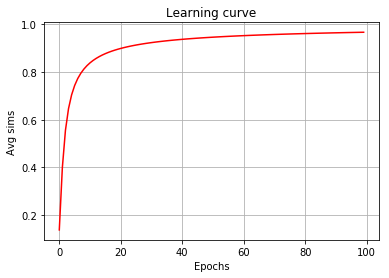

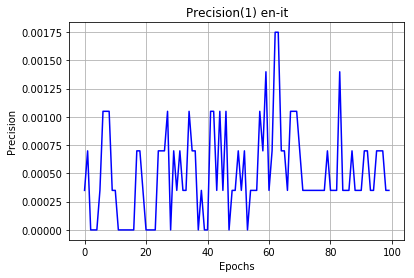

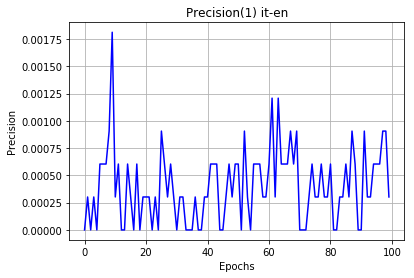

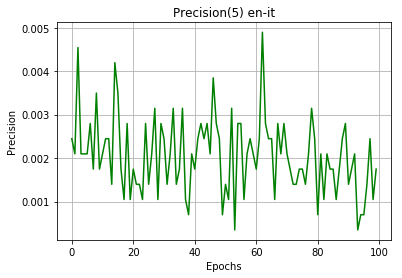

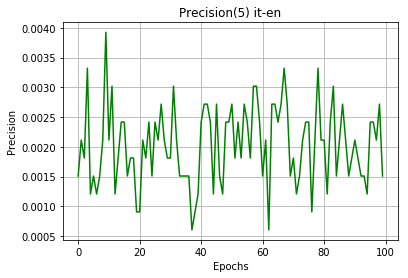

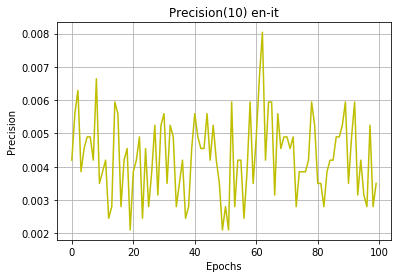

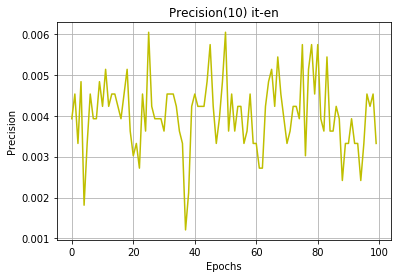

In [3]:
output_folder = '/home/eszti/projects/dipterv/panlex/output_permanent/20180112_1119_21'
plot_progress(output_folder=output_folder)

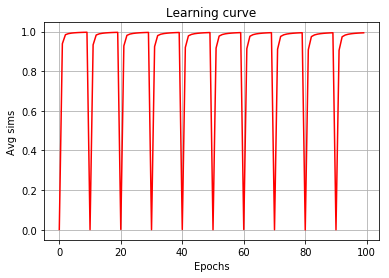

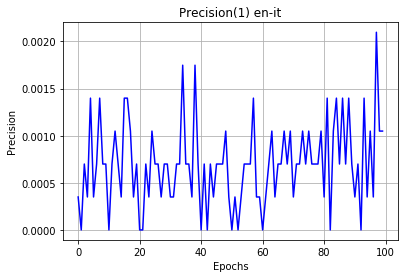

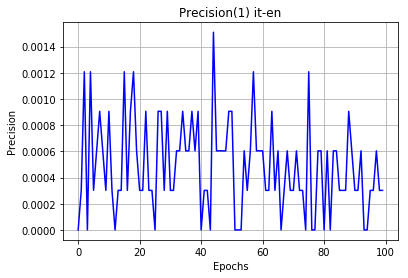

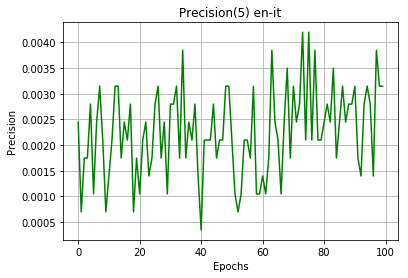

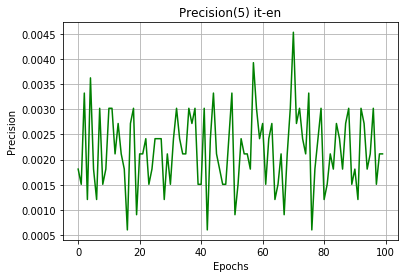

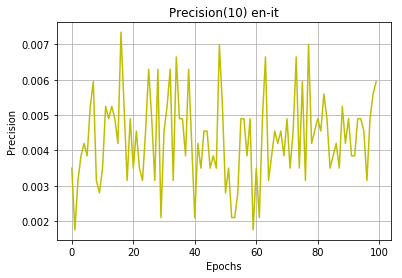

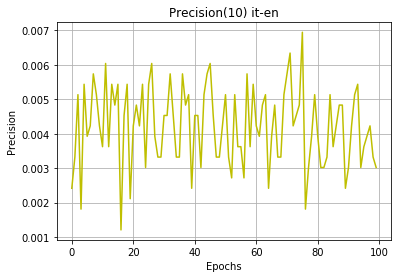

In [4]:
output_folder = '/home/eszti/projects/dipterv/panlex/output_permanent/20180115_1757_29'
plot_progress(output_folder=output_folder)

Check precision

In [5]:
emb_fn = '/mnt/permanent/Language/Multi/FB/wiki.en/wiki.en.vec'
limit = 10000
model = KeyedVectors.load_word2vec_format(emb_fn, binary=False, limit=limit)

In [6]:
nbs = [1, 50, 99]
T_fn = os.path.join(output_folder, 'train_mod', 'T_{}.pickle'.format(nbs[0]))
with open(T_fn, 'rb') as f:
    T = pickle.load(f)

T = np.random.rand(300,300)
model.most_similar('dog')
model['dog']

model_T = copy.deepcopy(model)
W = copy.deepcopy(model_T.syn0)
model_T.syn0 = np.dot(W, T)
model_T.most_similar('dog')
model_T['dog']

[('dogs', 0.8104336857795715),
 ('rabbit', 0.649113118648529),
 ('cat', 0.6380517482757568),
 ('pig', 0.6210767030715942),
 ('cow', 0.5820291042327881),
 ('pet', 0.5802521705627441),
 ('breed', 0.571986198425293),
 ('animal', 0.5635776519775391),
 ('shepherd', 0.5540464520454407),
 ('sheep', 0.5497960448265076)]

array([  1.90830007e-01,   6.52820021e-02,  -2.64649987e-01,
         1.17569998e-01,  -2.89559990e-01,   9.89840031e-02,
        -3.21810007e-01,  -2.76789993e-01,   7.27320015e-02,
         2.14860007e-01,  -6.53079972e-02,   1.78479999e-01,
         1.23269998e-01,  -3.18390012e-01,   2.15470001e-01,
        -1.81380004e-01,  -1.30289998e-02,  -7.66519979e-02,
         4.37910017e-03,  -5.34259994e-03,   2.82550007e-01,
        -4.02700007e-02,  -3.26499999e-01,  -1.81319997e-01,
         2.39600003e-01,  -1.58060004e-03,  -1.16250001e-01,
         1.71140000e-01,   2.95679986e-01,   2.10590005e-01,
         3.72429997e-01,   7.54590034e-02,  -7.60800019e-02,
        -1.70110002e-01,   2.27229998e-01,  -3.42839994e-02,
        -1.22510001e-01,  -2.42760003e-01,  -3.36940004e-03,
         3.56310010e-01,  -1.41930003e-02,  -1.75659999e-01,
         2.58789994e-02,   2.33940005e-01,   1.42370000e-01,
         3.12810004e-01,   1.22840002e-01,  -2.68900007e-01,
         1.57000005e-01,

[('dogs', 0.8104336857795715),
 ('rabbit', 0.649113118648529),
 ('cat', 0.6380517482757568),
 ('pig', 0.6210767030715942),
 ('cow', 0.5820291042327881),
 ('pet', 0.5802521705627441),
 ('breed', 0.571986198425293),
 ('animal', 0.5635776519775391),
 ('shepherd', 0.5540464520454407),
 ('sheep', 0.5497960448265076)]

array([ 0.3013164 ,  0.09718902, -0.09486542,  0.03754018,  0.05288863,
       -0.39080226,  1.61561045,  1.2202446 , -0.1181551 ,  2.2875837 ,
       -0.80011822,  0.80542078,  0.88129672,  1.67016659,  1.11135445,
        1.6039999 ,  0.68892571, -0.06196582,  0.99195505, -0.2254208 ,
        0.73280169, -0.34944135,  2.3837322 ,  2.31035636, -0.14147873,
       -0.7333743 ,  0.20497643,  1.46627451,  0.63800712,  0.12149777,
        0.27179969,  4.81397589,  0.54877432, -0.26587658, -0.73001624,
        0.64597415,  0.88983832, -1.08024601,  0.30844554,  2.06271933,
        0.58344395,  1.04869714,  1.75771985,  0.13395033,  0.47604719,
        1.04815284,  2.03427897,  1.8998839 ,  0.35906067, -1.34198857,
        1.76954095,  0.15055192, -1.1883235 , -0.17904527,  0.79568967,
        1.23932843, -0.09636292,  2.82989115,  1.42094569,  0.67313422,
        2.6702281 , -0.43692544, -0.30210703, -0.52097864,  1.96844848,
        0.57334956, -0.08731809,  2.79517691,  3.12269884,  0.42